In [30]:
import kagglehub
import os
import pandas as pd
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("toramky/automobile-dataset")

csv = os.listdir(path)[0]
df = pd.read_csv(os.path.join(path, csv))

df = df.drop(columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'fuel-system', 'engine-location', 'engine-type', 'num-of-cylinders'])

df = df.apply(pd.to_numeric, errors='coerce')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()



(160, 16)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


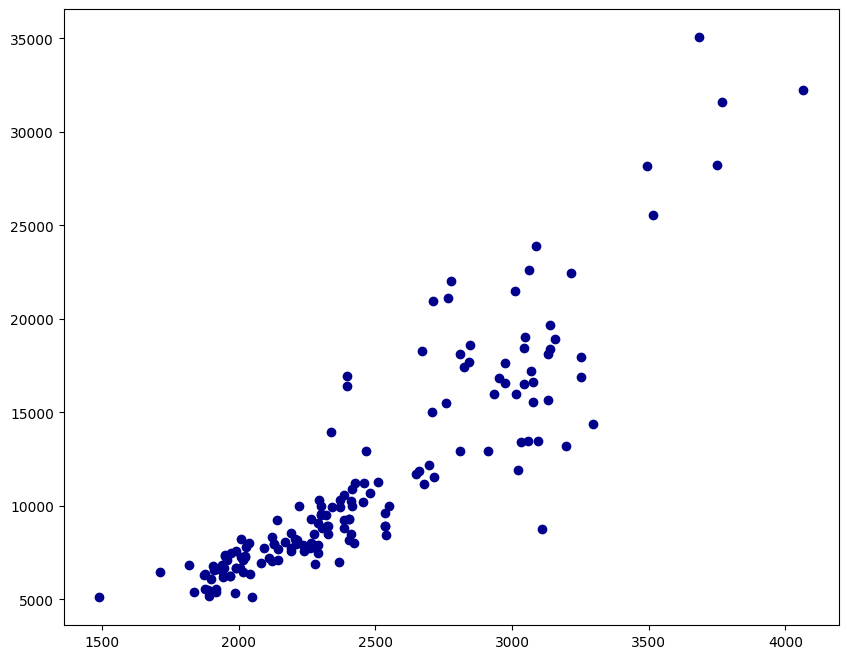

In [4]:
plt.figure(figsize= (10,8))
plt.scatter(df['curb-weight'], df.price, color = 'darkblue')

In [33]:

y = df['price']
X = df[['curb-weight']]

slr = LinearRegression()
slr.fit(X, y)


print(slr.intercept_)
print(slr.coef_)

-15376.866928299061
[10.89859447]


Per one unit of price rises 12 euros. correlation doesnt equal causation.

In [34]:
cross_validate(slr, X, y, return_train_score=True, cv=4)

{'fit_time': array([0.00332093, 0.00553966, 0.00276995, 0.00215125]),
 'score_time': array([0.0014689 , 0.00253224, 0.01046276, 0.00436592]),
 'test_score': array([0.73752564, 0.81483629, 0.65408352, 0.80765298]),
 'train_score': array([0.80666168, 0.78145798, 0.81816955, 0.79388068])}

In [35]:
cross_validate(slr, X, y, return_train_score=True, cv=4)['test_score'].mean()

0.7535246063073477

this means that curb weight accounts for 57% of price variance.

In [36]:
pred_price = slr.predict(X)
residus = pred_price - y
residus.describe()

count    1.600000e+02
mean     2.683009e-12
std      2.629597e+03
min     -1.027155e+04
25%     -1.108884e+03
50%      1.447688e+02
75%      1.447202e+03
max      9.739762e+03
Name: price, dtype: float64

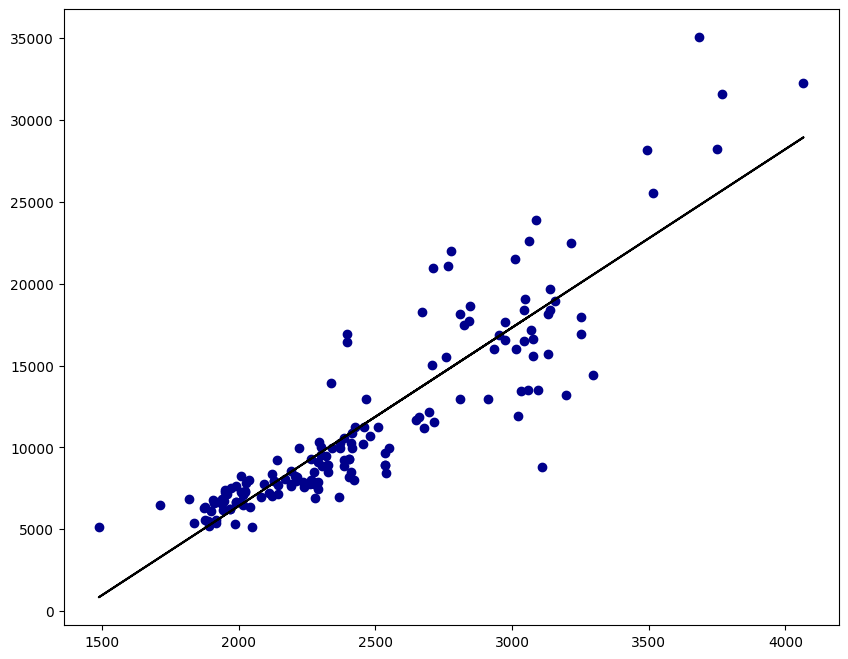

In [37]:
plt.figure(figsize= (10,8))
plt.scatter(X['curb-weight'], y, color = 'darkblue')
plt.plot(X, pred_price, color='k')

The regression line seems reasonably tight. A few points are further from the line, notably those with a high price, but the overall picture remains relatively correct.

Outliers can have a major influence on linear regression models: since the essence of regression is the minimization of squared residuals, large residuals have a disproportionate influence on the model. The straight line display helps us to detect influential outliers. In our graph, there appear to be no influential outliers.

As an example, to illustrate how influential an outlier can be, let's take the extreme case in which we add a single outlier to our DataFrame - a very light, very expensive car. We calculate a new regression model, and obtain the following line, much less well fitted to the data:

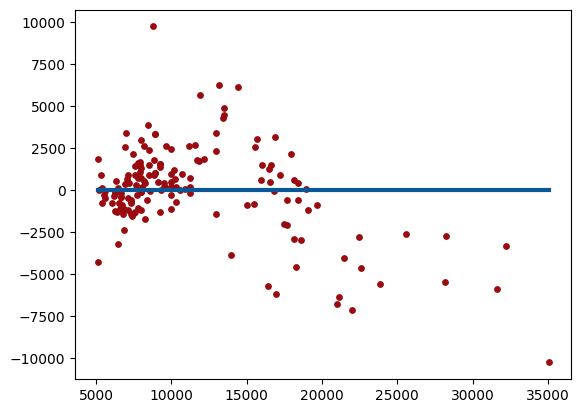

In [38]:
plt.scatter(y, residus, color='#980a10', s=15)
plt.plot((y.min(), y.max()), (0, 0), lw=3, color='#0a5798')

assumtions must  be centered (expectation equal to 0), of constant variance (homoscedasticity), independent and Gaussian.

((array([-2.62575906, -2.30828335, -2.12658078, -1.99606838, -1.8926981 ,
         -1.80631225, -1.73162064, -1.66550184, -1.60595305, -1.55160914,
         -1.50149598, -1.45489304, -1.41125166, -1.37014394, -1.33122945,
         -1.29423265, -1.25892722, -1.22512489, -1.19266724, -1.16141968,
         -1.13126679, -1.10210882, -1.07385892, -1.04644101, -1.019788  ,
         -0.99384042, -0.96854529, -0.94385517, -0.91972743, -0.89612359,
         -0.87300875, -0.8503512 , -0.828122  , -0.80629468, -0.78484491,
         -0.7637503 , -0.74299021, -0.72254551, -0.70239846, -0.68253257,
         -0.66293247, -0.64358381, -0.62447314, -0.60558788, -0.58691618,
         -0.5684469 , -0.55016953, -0.53207414, -0.51415132, -0.49639217,
         -0.47878822, -0.46133142, -0.44401409, -0.42682892, -0.40976888,
         -0.3928273 , -0.37599772, -0.35927398, -0.34265012, -0.32612043,
         -0.30967937, -0.29332161, -0.27704196, -0.26083541, -0.24469708,
         -0.22862224, -0.21260626, -0.

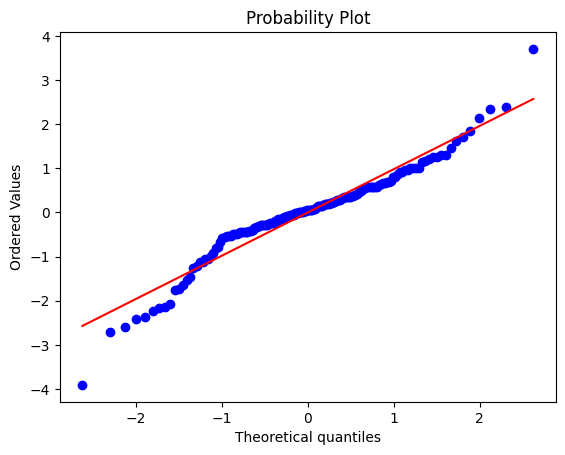

In [39]:
import scipy.stats as stats

residus_norm = (residus-residus.mean()) / residus.std()
stats.probplot(residus_norm, plot=plt)

https://www.datacamp.com/tutorial/qq-plot

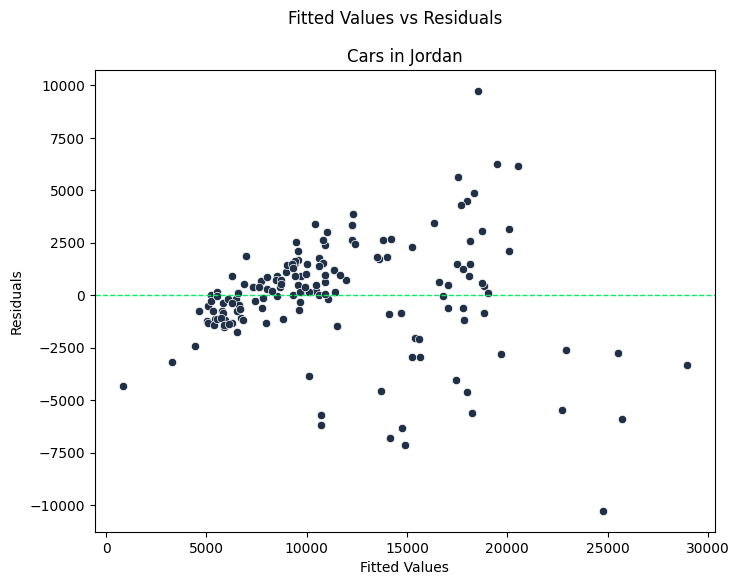

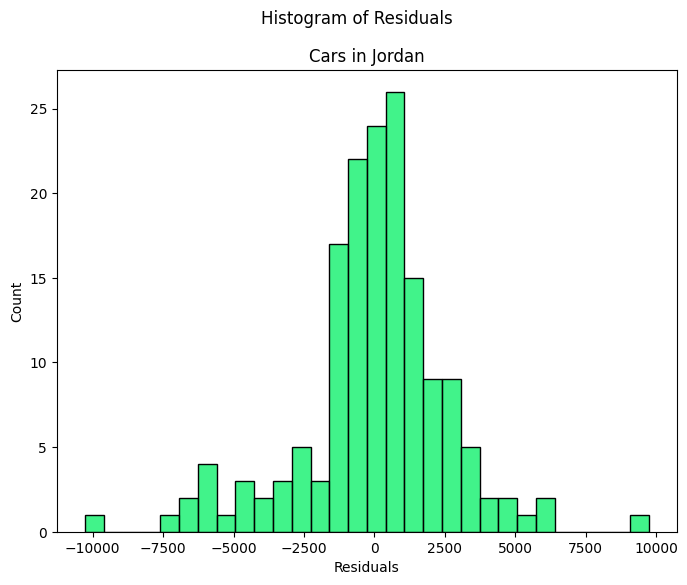

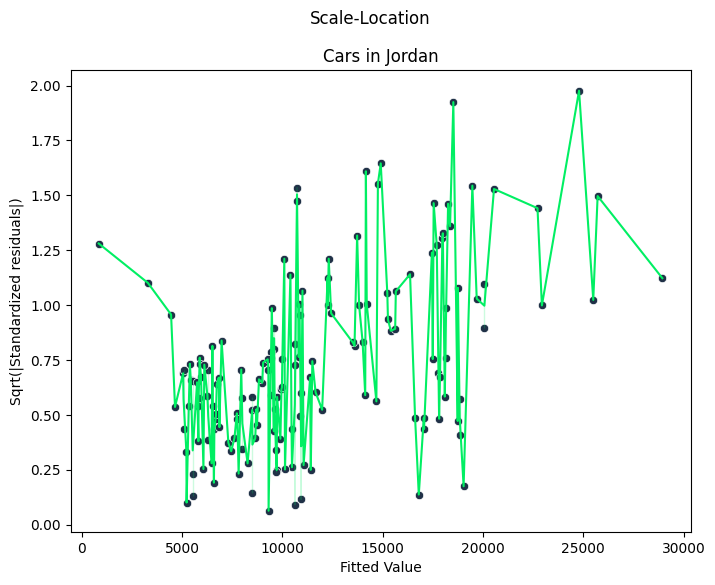

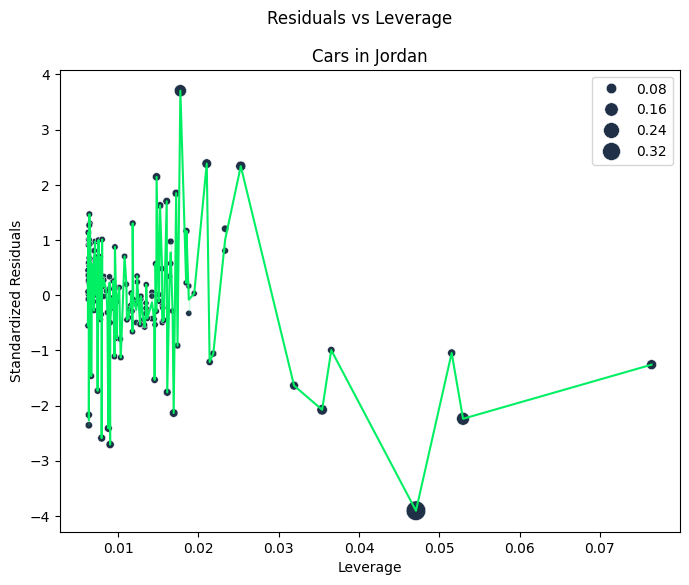

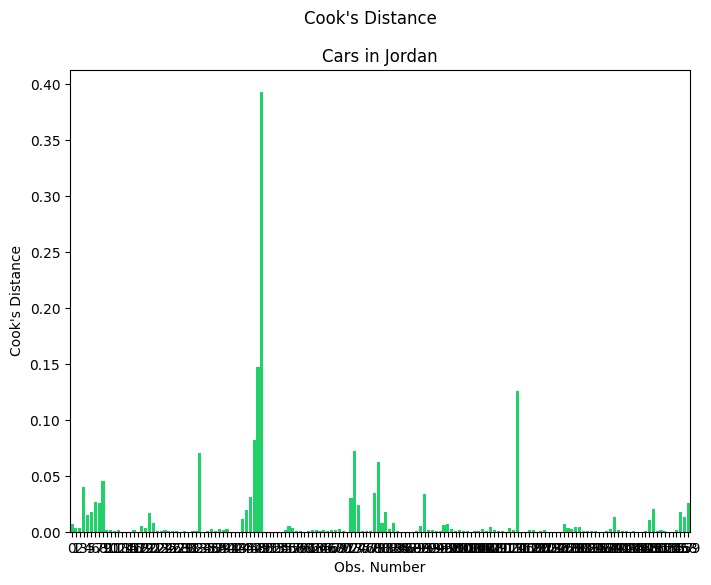

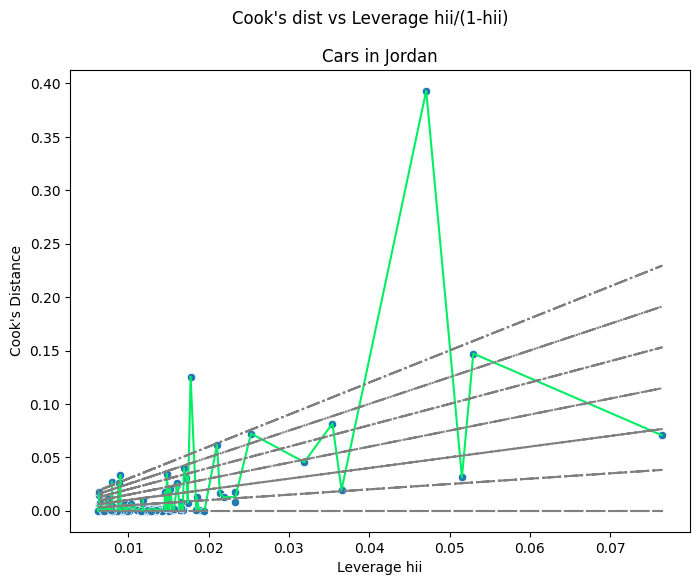

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming the model and data are already defined in the notebook
# Using the existing data and model from the notebook

fitted_values = slr.predict(X)
standardized_residuals = (residus - residus.mean()) / residus.std()
influence = sm.OLS(y, sm.add_constant(X)).fit().get_influence()
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag

# Fitted Values vs Residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residus, color='#203147')
plt.axhline(0, linestyle='dashed', color='#01ef63', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Cars in Jordan")
plt.suptitle("Fitted Values vs Residuals")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residus, color='#01ef63', bins=30)
plt.xlabel("Residuals")
plt.title("Cars in Jordan")
plt.suptitle("Histogram of Residuals")
plt.show()

# Scale-Location
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=np.sqrt(np.abs(standardized_residuals)), color='#203147')
sns.lineplot(x=fitted_values, y=np.sqrt(np.abs(standardized_residuals)), color='#01ef63')
plt.xlabel("Fitted Value")
plt.ylabel("Sqrt(|Standardized residuals|)")
plt.title("Cars in Jordan")
plt.suptitle("Scale-Location")
plt.show()

# Leverage vs Standardized Residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=leverage, y=standardized_residuals, size=cooks_d, color='#203147', sizes=(20, 200))
sns.lineplot(x=leverage, y=standardized_residuals, color='#01ef63')
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.title("Cars in Jordan")
plt.suptitle("Residuals vs Leverage")
plt.show()

# Observation Number vs Cook's Distance
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(len(cooks_d)), y=cooks_d, color='#01ef63')
plt.xlabel("Obs. Number")
plt.ylabel("Cook's Distance")
plt.title("Cars in Jordan")
plt.suptitle("Cook's Distance")
plt.show()

# Leverage vs Cook's Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x=leverage, y=cooks_d)
sns.lineplot(x=leverage, y=cooks_d, color='#01ef63')
plt.xlabel("Leverage hii")
plt.ylabel("Cook's Distance")
plt.title("Cars in Jordan")
plt.suptitle("Cook's dist vs Leverage hii/(1-hii)")
for slope in np.arange(0, 3.5, 0.5):
    plt.plot(leverage, slope * leverage, linestyle='-.', color='gray')

plt.show()

In [13]:
from sklearn.feature_selection import f_regression

print('F-score:', f_regression(X, y)[0], 'p-value :', f_regression(X, y)[1])

F-score: [627.66106768] p-value : [6.61188355e-57]


In [14]:
print('p-value:', f_regression(X, y)[1])

p-value: [6.61188355e-57]


we reject null

In [15]:


pred_price = slr.predict(X)
y = y[:len(pred_price)]

def rmse(predictions, targets):
    if len(predictions) != len(targets):
        raise ValueError("Predictions and targets must have the same length.")
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(pred_price, y)


/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_12999/3829920312.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y[:len(pred_price)]


2621.367031971261

In [40]:
X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=789)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [42]:
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

feats = list(X.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'Estimated value': coeffs}, index = feats)

,Estimated value
intercept,-67355.221396
symboling,-169.230266
normalized-losses,23.323103
wheel-base,360.398260
length,-155.486191
width,665.447818
height,191.605326
curb-weight,3.588270
engine-size,24.476436
bore,-897.115423


In [21]:
print("Coefficient of determination of the model :", lr.score(X_train, y_train))
print("Coefficient of determination with cross-validation :", cross_val_score(lr,X_train,y_train).mean())


Coefficient of determination of the model : 0.8653722811302433
Coefficient of determination with cross-validation : 0.7792780532029527


In [22]:
lr.score(X_test,y_test)


0.7427262199777214

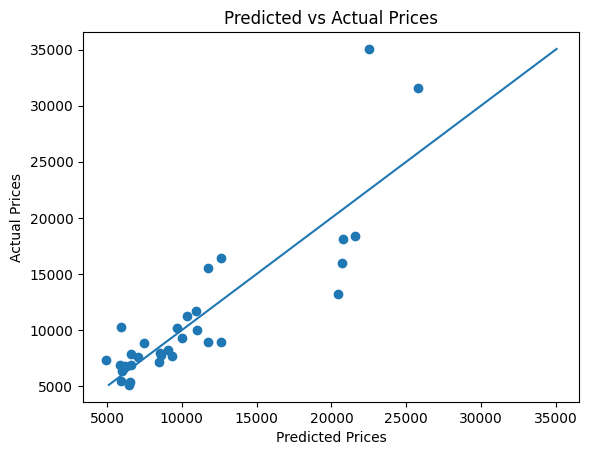

In [25]:
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test)
plt.plot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()))
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Predicted vs Actual Prices")
plt.show()


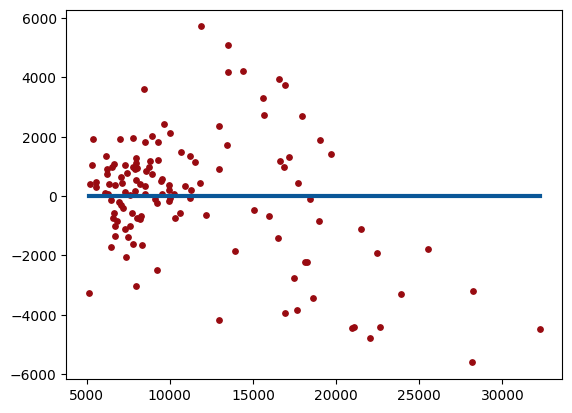

In [24]:
pred_train = lr.predict(X_train)
residus = pred_train - y_train

plt.scatter(y_train, residus, color = '#980a10', s=15)
plt.plot((y_train.min(),y_train.max()), (0,0), lw=3, color = '#0a5798')

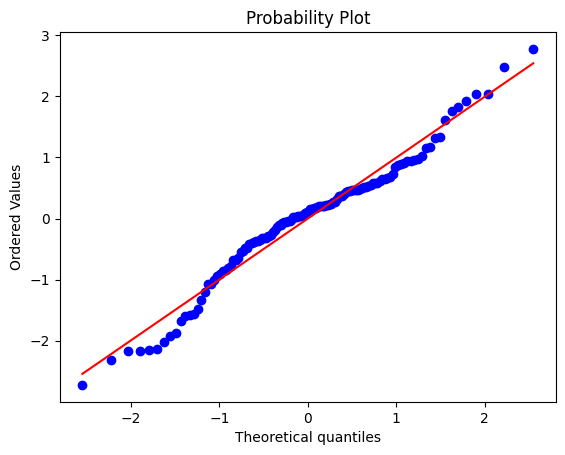

In [26]:
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)

plt.show()

<Axes: >

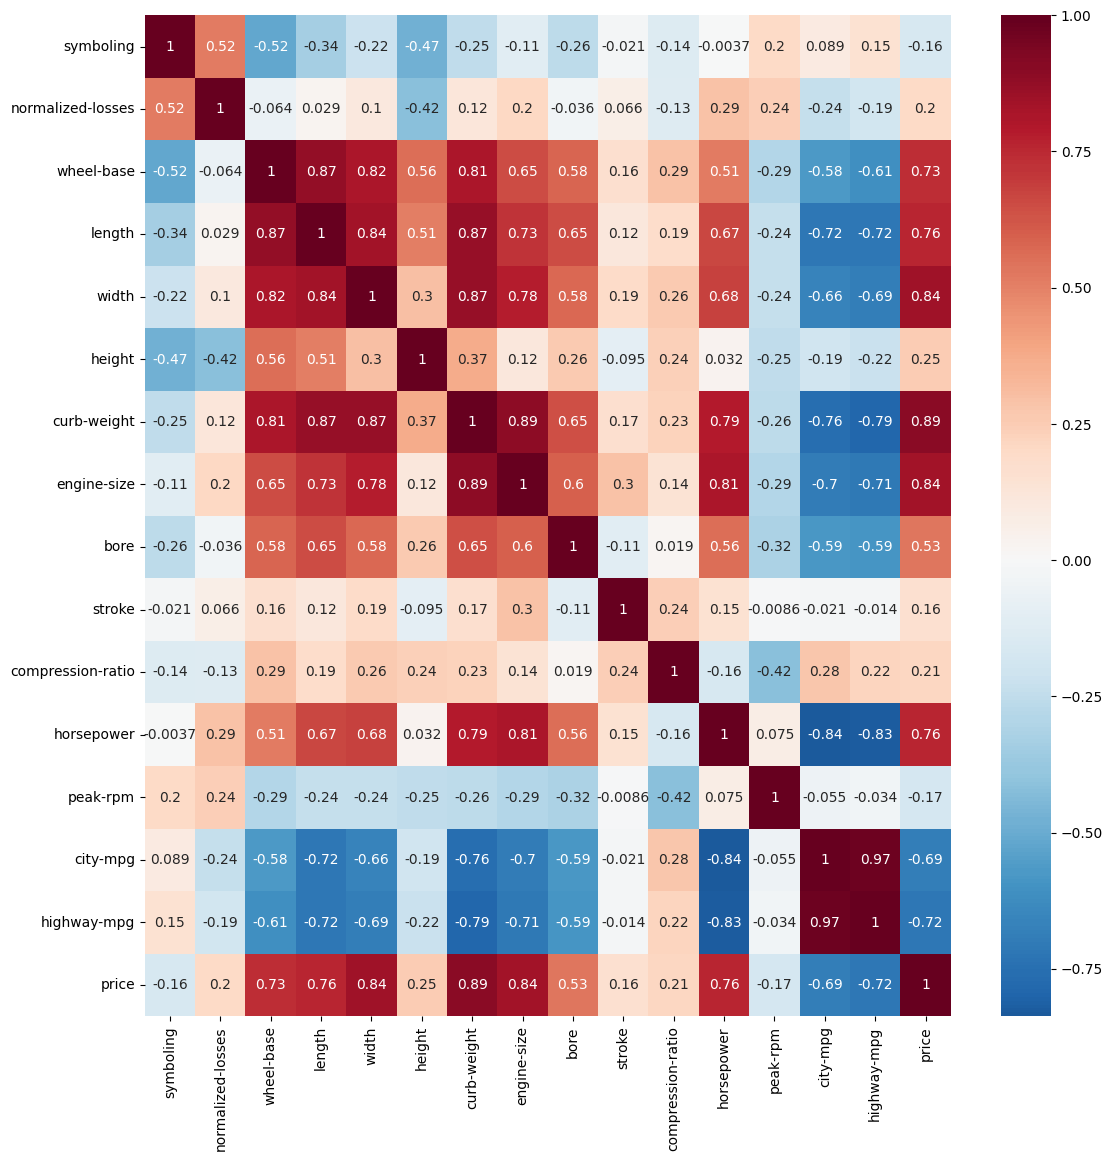

In [43]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),  annot=True, cmap="RdBu_r", center =0)

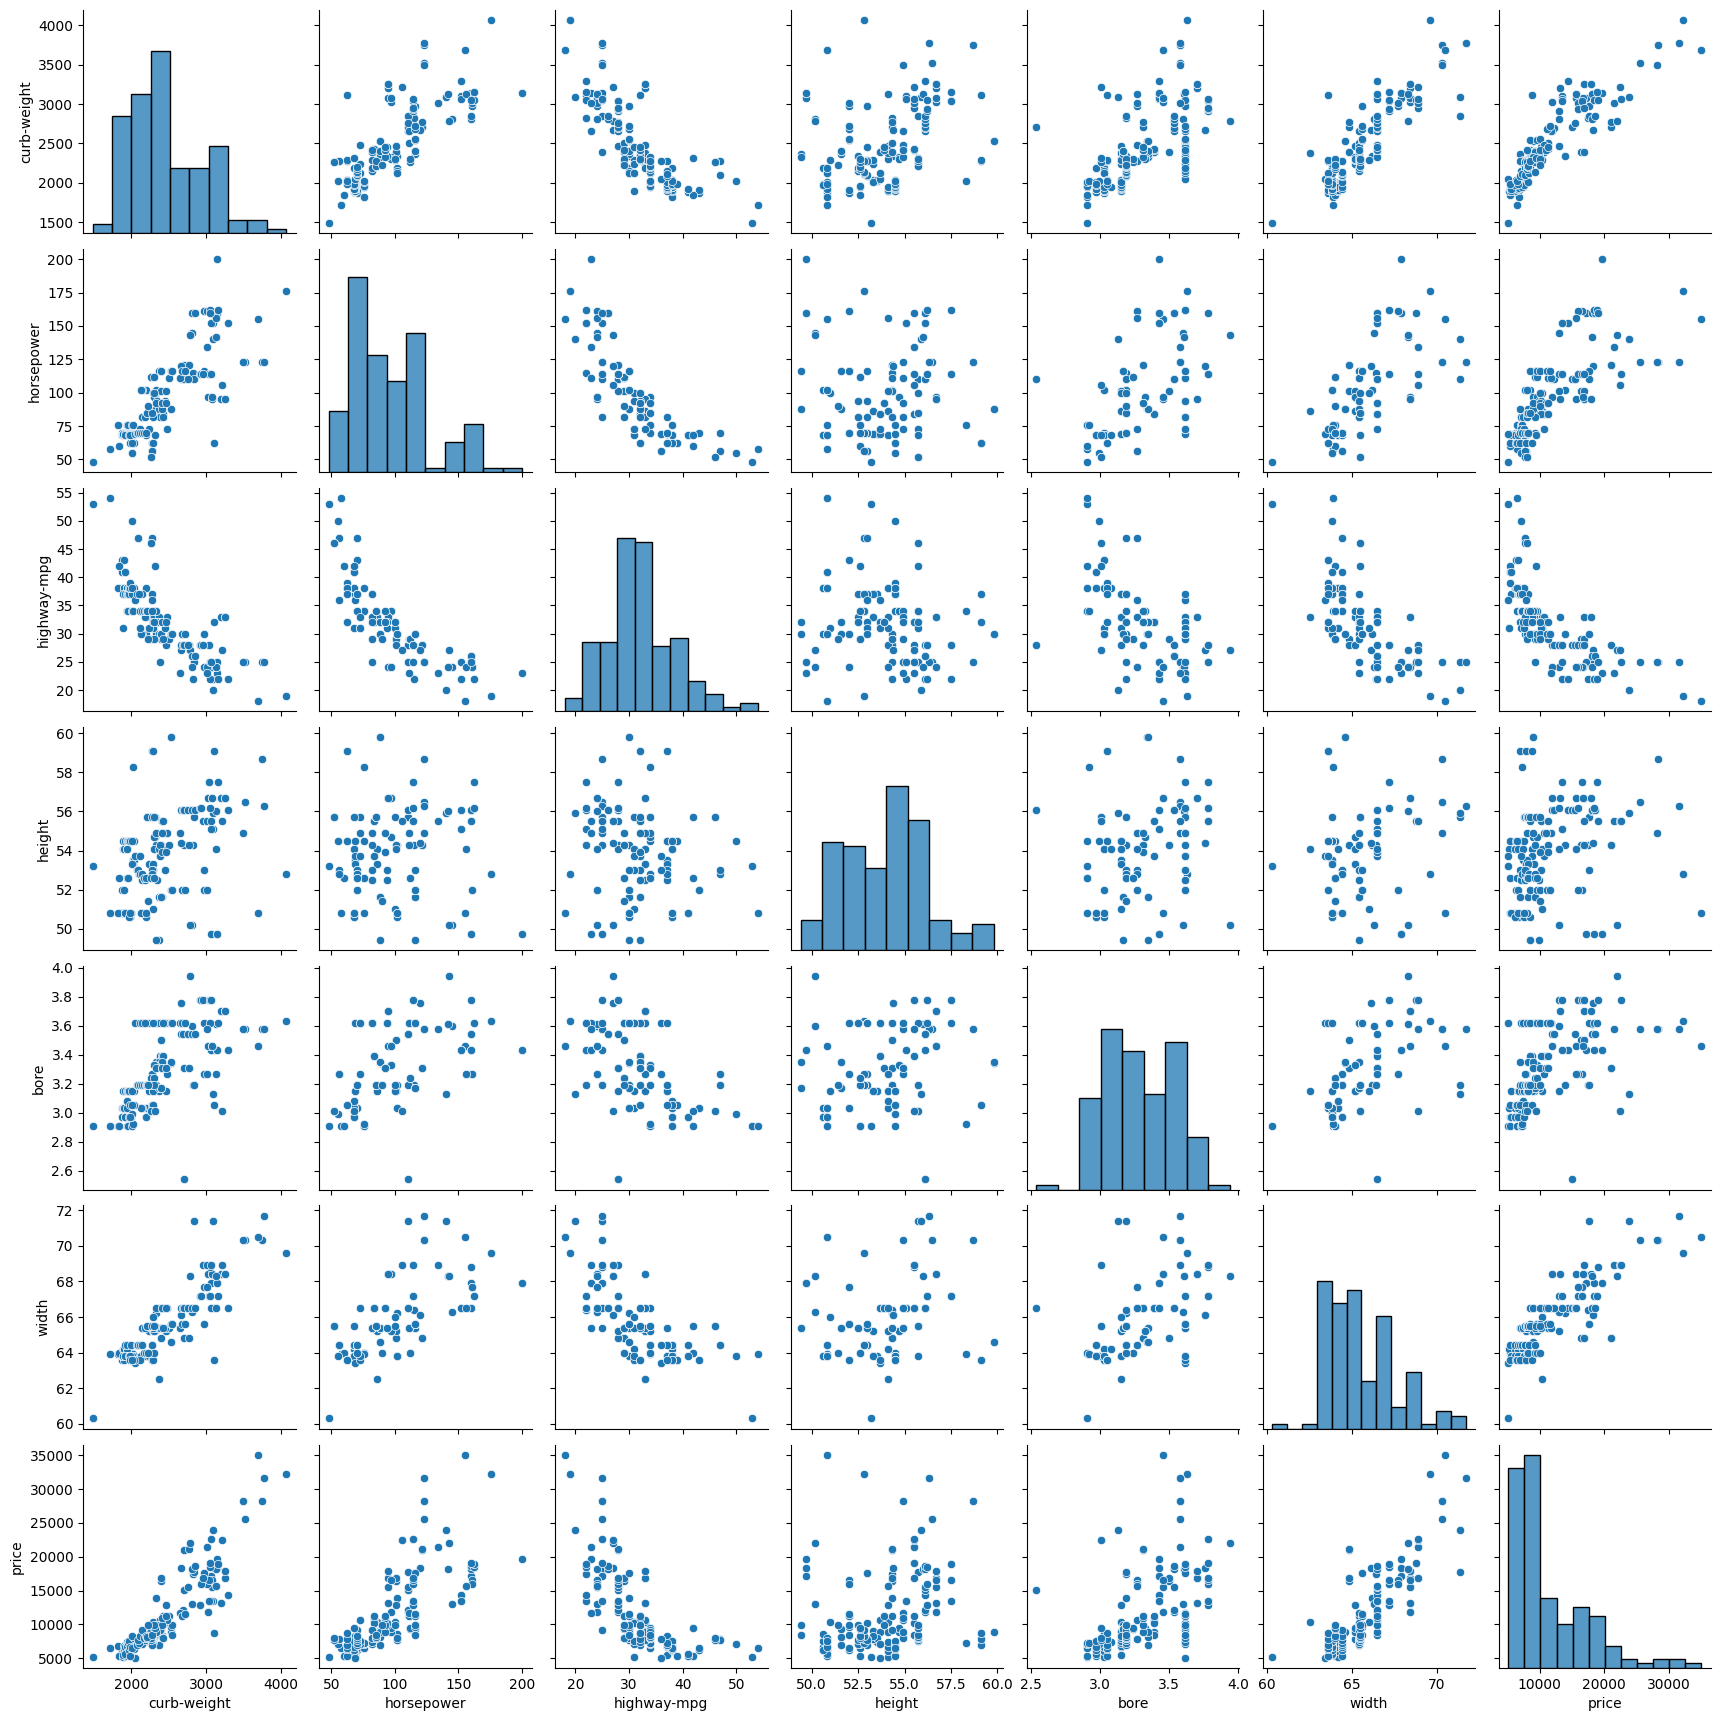

In [44]:
sns.pairplot(df[['curb-weight', 'horsepower', 'highway-mpg', 'height', 'bore', 'width', 'price']])

In [46]:
signif_features = ['curb-weight', 'horsepower', 'bore', 'width']
lr2 = LinearRegression()
lr2.fit(X_train[signif_features], y_train)
print(lr2.score(X_train[signif_features], y_train))
print(lr2.score(X_test[signif_features], y_test))




0.8254838473112693
0.8352541128958759


In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sk = SelectKBest(f_regression, k=3)

sk.fit(X = X, y = y)

X.columns[sk.get_support()]


Index(['width', 'curb-weight', 'engine-size'], dtype='object')

In [49]:
sk_train = sk.transform(X_train)
sk_test = sk.transform(X_test)

sklr = LinearRegression()
sklr.fit(sk_train, y_train)

print(sklr.score(sk_train, y_train))
print(sklr.score(sk_test, y_test))


0.8196850396631414
0.8411755364162685


In [50]:
from sklearn.feature_selection import SelectFromModel

lr = LinearRegression()

sfm = SelectFromModel(lr)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

sfm_train = sfm.fit_transform(X_train_scaled, y_train)

sfm_test = sfm.transform(X_test_scaled)

In [51]:
X.columns[sfm.get_support()]


Index(['wheel-base', 'length', 'width', 'curb-weight', 'horsepower'], dtype='object')

In [52]:
sfmlr = LinearRegression()
sfmlr.fit(sfm_train, y_train)

print(sfmlr.score(sfm_train, y_train))
print(sfmlr.score(sfm_test, y_test))


0.841126443445994
0.7857407070363062
